In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm
from statsmodels.tools.tools import add_constant

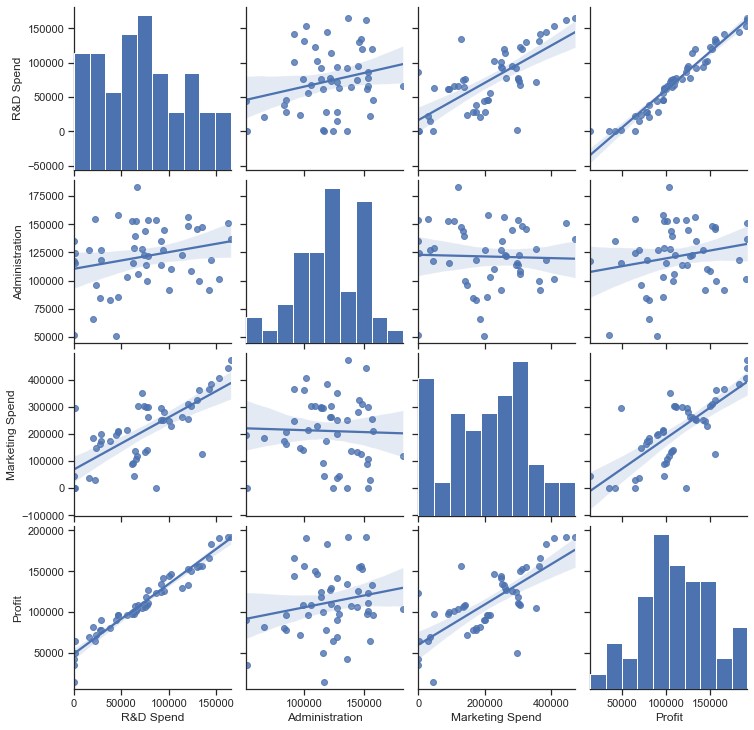

In [2]:
# Dataset
ds = pd.read_csv('data/50_startups.csv')
X = ds.iloc[:, 0:4].values
y = ds.iloc[:, -1].values

# Exploratory analysis
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(ds, kind="reg")


In [4]:
# Categorical data
labelencoder_X = LabelEncoder()
X[:, -1] = labelencoder_X.fit_transform(X[:, -1])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]


In [5]:
# Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [6]:
# Backward elimination
X_opt = add_constant(X, prepend=True)
regressor_ols = sm.OLS(endog=y, exog=X_opt).fit()
initial_summary = regressor_ols.summary()
pvalues = regressor_ols.pvalues

while max(pvalues > 0.05):
    max_index = np.argmax(pvalues)
    X_opt = np.delete(X_opt, max_index, axis=1)
    regressor_ols = sm.OLS(endog=y, exog=X_opt).fit()
    pvalues = regressor_ols.pvalues

final_summary = regressor_ols.summary()

C:\Users\Diogo\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Diogo\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Diogo\Anaconda3\lib\site-pack

In [7]:
final_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 23 Jun 2020   Prob (F-statistic):                nan
Time:                        17:54:30   Log-Likelihood:                 1089.9
No. Observations:                  50   AIC:                            -2080.
Df Residuals:                       0   BIC:                            -1984.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.034e+04        inf          0        nan         nan         nan
x1         -2.342e+04        inf         -0        nan         nan         nan
x2         -1.552e+04        inf         -0        nan         nan         nan
x3         -2.107e+04        inf         -0        nan         nan         nan
x4         -1.391e+04        inf         -0        nan         nan         nan
x5         -1.008e+04        inf         -0        nan         nan         nan
x6         -1.066e+04        inf         -0        nan         nan         nan
x7         -8563.5633        inf         -0        nan         nan         nan
x8         -1.164e+04        inf         -0        nan         nan         nan
x9         -7332.5791        inf         -0        nan         nan         nan
x10        -6316.4233        inf         -0        nan         nan         nan
x11        -5394.4733        inf         -0        nan         nan         nan
x12        -2413.3466        inf         -0        nan         nan         nan
x13        -4998.7845        inf         -0        nan         nan         nan
x14         -158.7933        inf         -0        nan         nan         nan
x15        -5309.0024        inf         -0        nan         nan         nan
x16        -4664.1011        inf         -0        nan         nan         nan
x17        -4256.1124        inf         -0        nan         nan         nan
x18           79.5534        inf          0        nan         nan         nan
x19         3405.0534        inf          0        nan         nan         nan
x20        -3490.4078        inf         -0        nan         nan         nan
x21        -3141.1824        inf         -0        nan         nan         nan
x22        -1323.9791        inf         -0        nan         nan         nan
x23        -2155.8511        inf         -0        nan         nan         nan
x24         -784.5591        inf         -0        nan         nan         nan
x25        -2324.1291        inf         -0        nan         nan         nan
x26         7094.9501        inf          0        nan         nan         nan
x27         -974.6078        inf         -0        nan         nan         nan
x28         9934.5834        inf          0        nan         nan         nan
x29          -54.2811        inf         -0        nan         nan         nan
x30         2.013e+04        inf          0        nan         nan         nan
x31         3853.6576        inf          0        nan         nan         nan
x32         1.237e+04        inf          0        nan         nan         nan
x33         9626.5309        inf          0        nan         nan         nan
x34         4631.5022        inf          0        nan         nan         nan
x35         1.569e+04        inf          0        nan         nan         nan
x3